# Fingers Dataset

This notebook demonstrates the use of the "fingers" dataset.

In [1]:
import conx as cx
import random

Using TensorFlow backend.
Conx, version 3.6.1


In [2]:
cx.Dataset.datasets()

['cifar10',
 'cifar100',
 'cmu_faces_full_size',
 'cmu_faces_half_size',
 'cmu_faces_quarter_size',
 'figure_ground_a',
 'fingers',
 'gridfonts',
 'mnist']

In [3]:
fingers = cx.Dataset.get("fingers")

In [4]:
fingers.info()

**Dataset**: Fingers


This dataset contains 12,000 RGB images of human hands showing different
numbers of fingers, from zero to five.  The same fingers are always used
to represent each number category (e.g., all images of "two" have raised
index and middle fingers).  Each image is a 30 x 40 x 3 array of
floating-point numbers in the range 0 to 1.  The target data consists of
one-hot binary vectors of size 6 corresponding to the classification
categories "zero" through "five".  There are 2000 images for each category.

Created by Shreeda Segan and Albert Yu at Sarah Lawrence College.

**Information**:
   * name    : Fingers
   * length  : 12000

**Input Summary**:
   * shape  : (30, 40, 3)
   * range  : (0.0, 0.8666667)

**Target Summary**:
   * shape  : (6,)
   * range  : (0, 1)



In [5]:
net = cx.Network("Finger Math")
net.add(
    cx.ImageLayer("input1", (30, 40), 3),
    cx.ImageLayer("input2", (30, 40), 3),
    cx.FlattenLayer("flatten1"),
    cx.FlattenLayer("flatten2"),
    cx.Layer("hidden", 100, activation="relu"),
    cx.Layer("output", 11, activation="softmax"),
)
net.connect("input1", "flatten1")
net.connect("input2", "flatten2")
net.connect("flatten1", "hidden")
net.connect("flatten2", "hidden")
net.connect("hidden", "output")
net.compile(error="categorical_crossentropy", optimizer="sgd")

In [6]:
net.config["hspace"] = 300
net.picture()

<IPython.core.display.Javascript object>

In [7]:
def get_dataset():
    for i in range(len(fingers)):
        r1 = random.randint(0, len(fingers) - 1)
        v1 = int(fingers.labels[r1])
        r2 = random.randint(0, len(fingers) - 1)
        v2 = int(fingers.labels[r2])
        target = v1 + v2
        yield [[fingers.inputs[r1], fingers.inputs[r2]], cx.onehot(target, 11)]

In [8]:
net.dataset.load(get_dataset(), 1000)

In [9]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=0.8, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=300, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=True, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('', 'input1', 'input2'), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=5, options=('input1', 'input2', 'flatten1', 'flatten2', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AAK8AANAAAAIC8wAAbwAAsAAAkAAA0Pr2+vPn8wAAVkdH/7a2///X1yYm/2Zm/3h4/5aW/9fX//8VFf8mJv84OP9WVv9nZ/+Ghv+YmP+2thYW/zU1/1hY/4aG/6Wl/8jI//9GRv92dv+mpv/FxX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

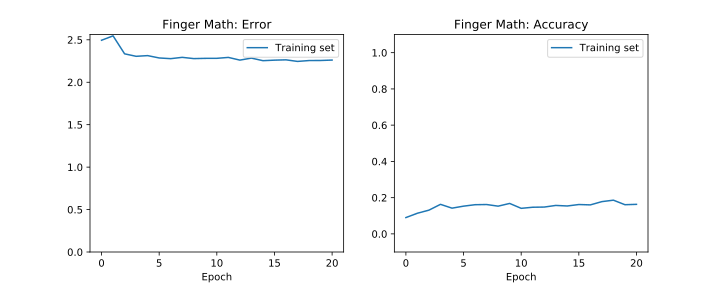

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#   20 |   2.26137 |   0.16300 


In [10]:
net.train(20, accuracy=1.0, batch_size=256, tolerance=0.5)